#Weekly Dataset Classification Project

Weekly percentage returns for the S&P 500 stock index between 1990 and 2010.

- Year: The year that the observation was recorded

- Lag1: Percentage return for previous week

- Lag2: Percentage return for 2 weeks previous

- Lag3: Percentage return for 3 weeks previous

- Lag4: Percentage return for 4 weeks previous

- Lag5: Percentage return for 5 weeks previous

- Volume: Volume of shares traded (average number of daily shares traded in billions)

- Today: Percentage return for this week

- Direction: A factor with levels ‘Down’ and ‘Up’ indicating whether the market had a positive or negative return on a given week.

##Extract the data

In [ ]:
!pip install ISLP

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from ISLP import load_data
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from ISLP.models import contrast
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import patsy
from ISLP.models import ModelSpec as MS
from ISLP import confusion_table

In [47]:
weekly = load_data('Weekly')
weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Year       1089 non-null   int64   
 1   Lag1       1089 non-null   float64 
 2   Lag2       1089 non-null   float64 
 3   Lag3       1089 non-null   float64 
 4   Lag4       1089 non-null   float64 
 5   Lag5       1089 non-null   float64 
 6   Volume     1089 non-null   float64 
 7   Today      1089 non-null   float64 
 8   Direction  1089 non-null   category
dtypes: category(1), float64(7), int64(1)
memory usage: 69.4 KB


In [48]:
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [44]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [45]:
weekly.describe(include='category')

,Direction
count,1089
unique,2
top,Up
freq,605


In [50]:
weekly = pd.get_dummies(weekly, drop_first=True) #0 for down direction, 1 for up direction
weekly.Direction_Up = weekly.Direction_Up.astype(np.int64) #
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Up
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


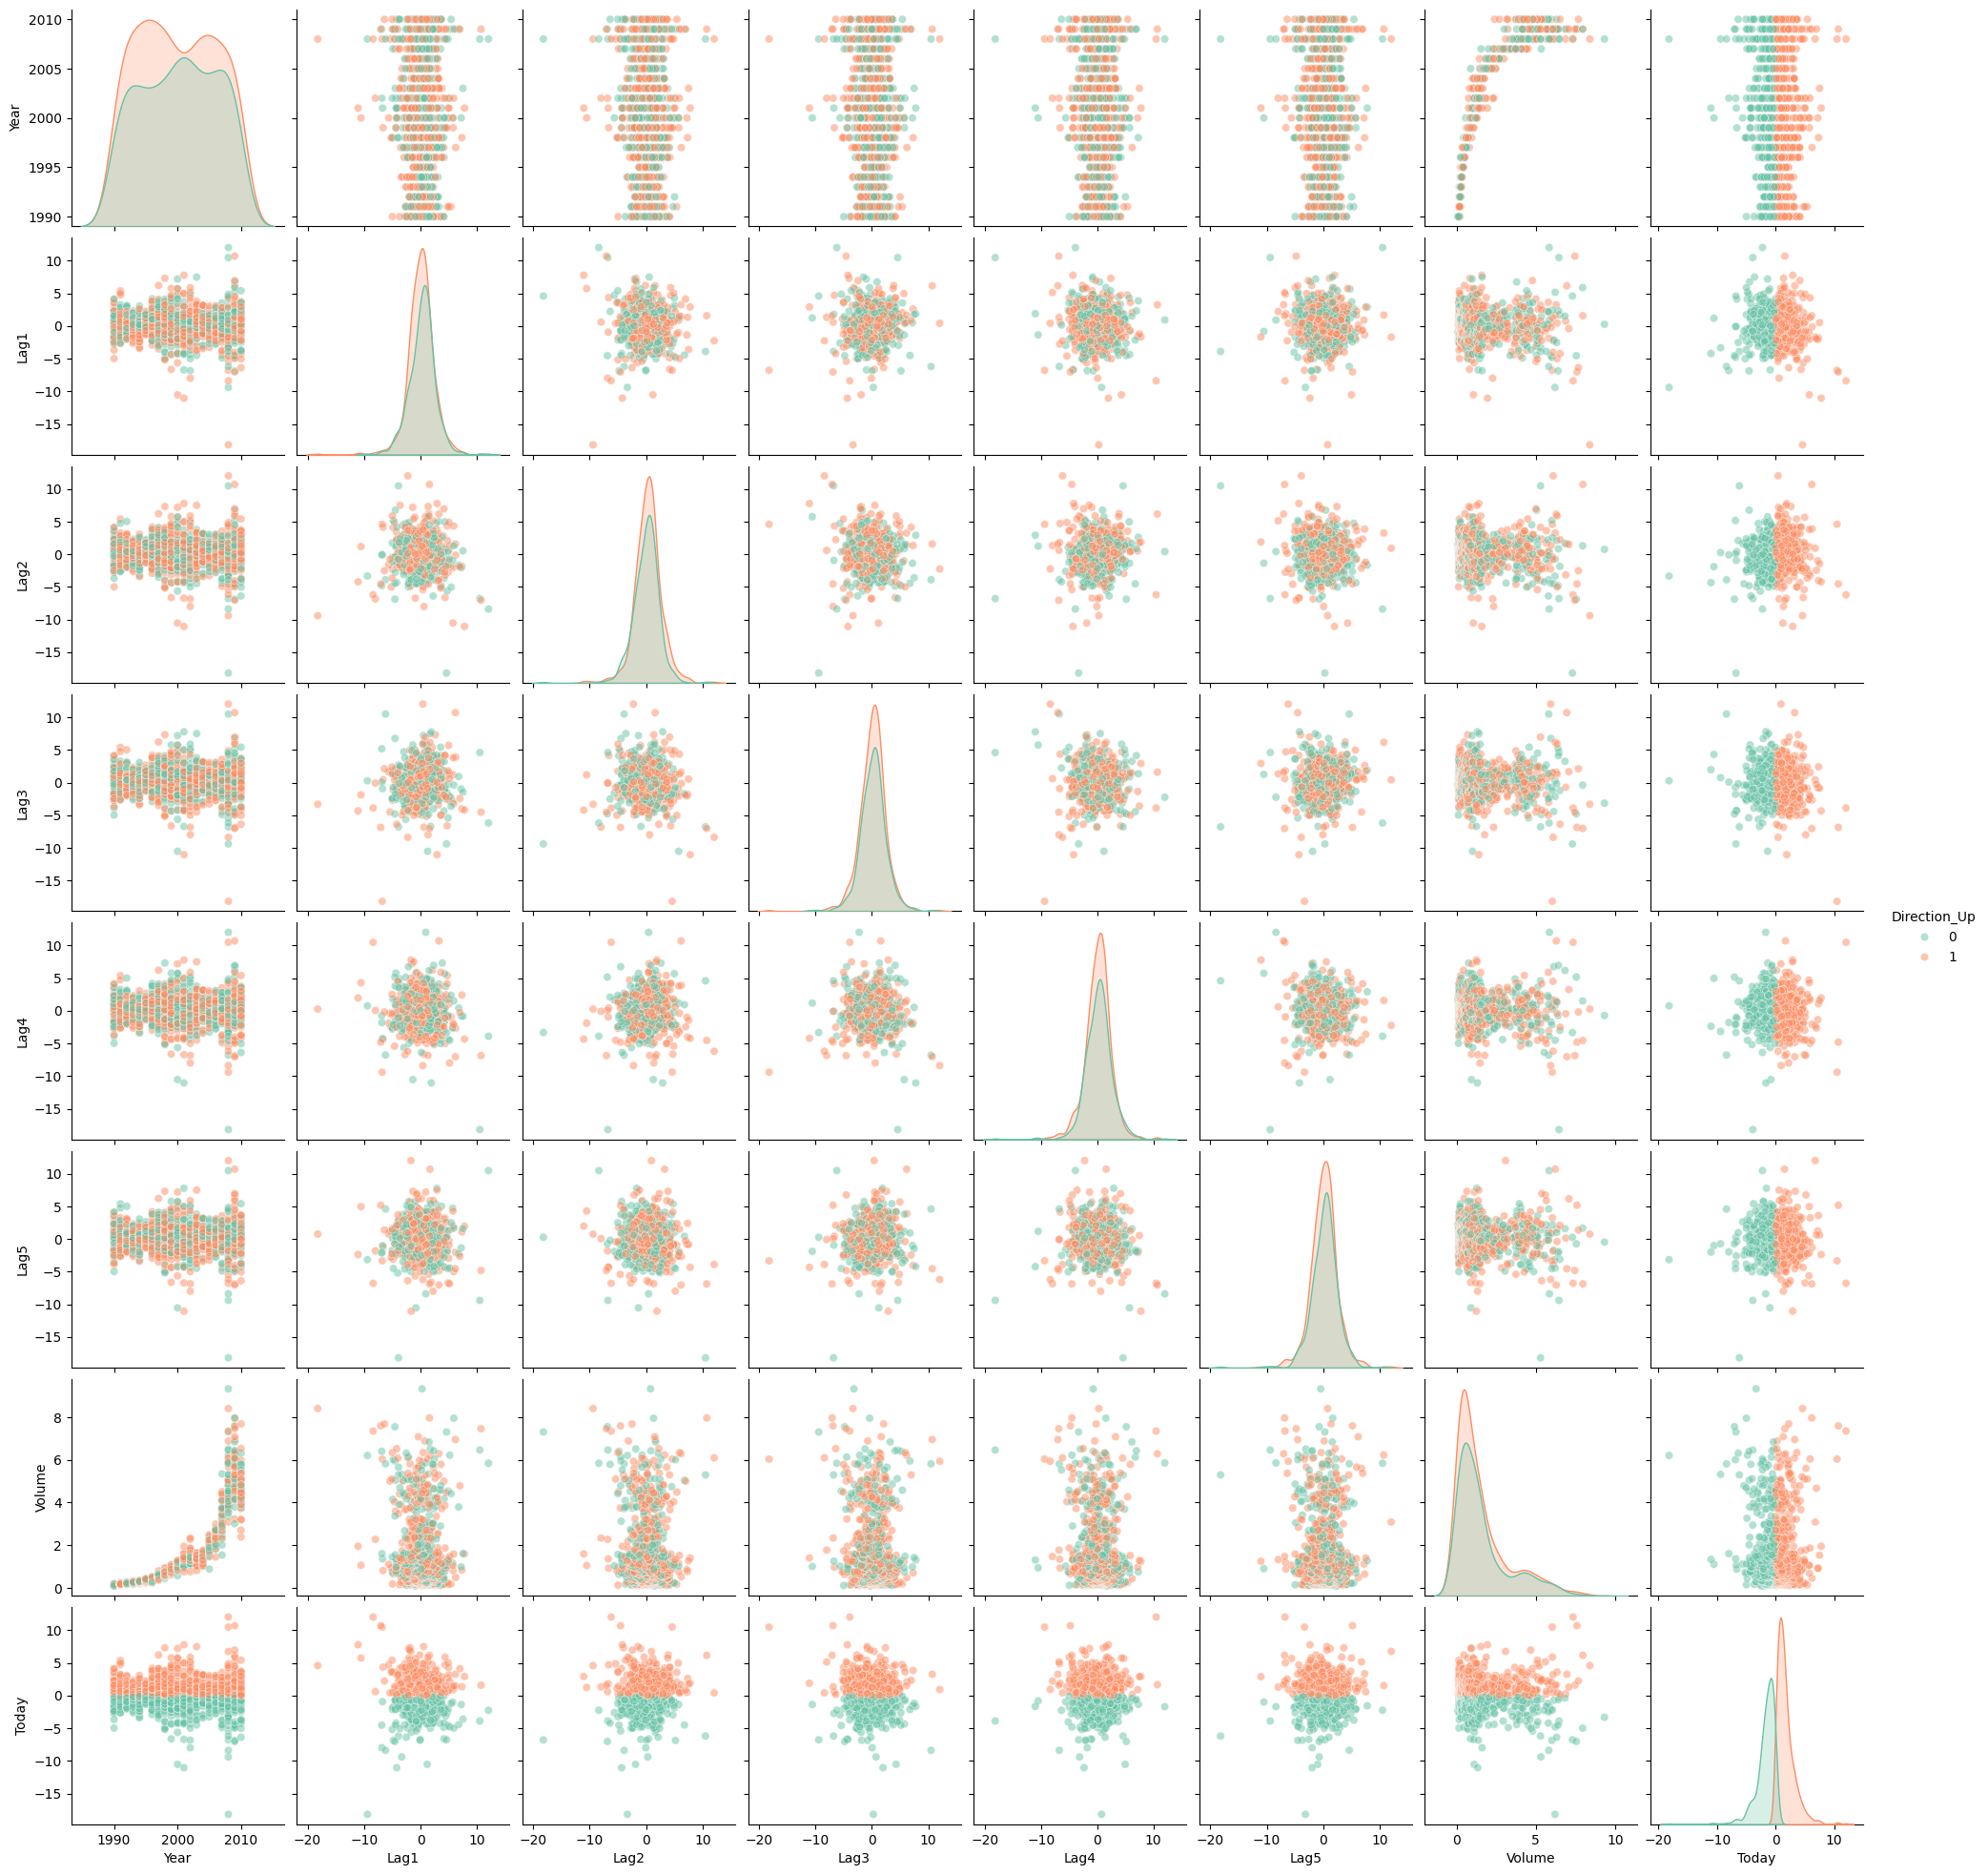

In [53]:
sns.pairplot(weekly, hue='Direction_Up', plot_kws={'alpha': 0.5}, palette='Set2')
plt.show()

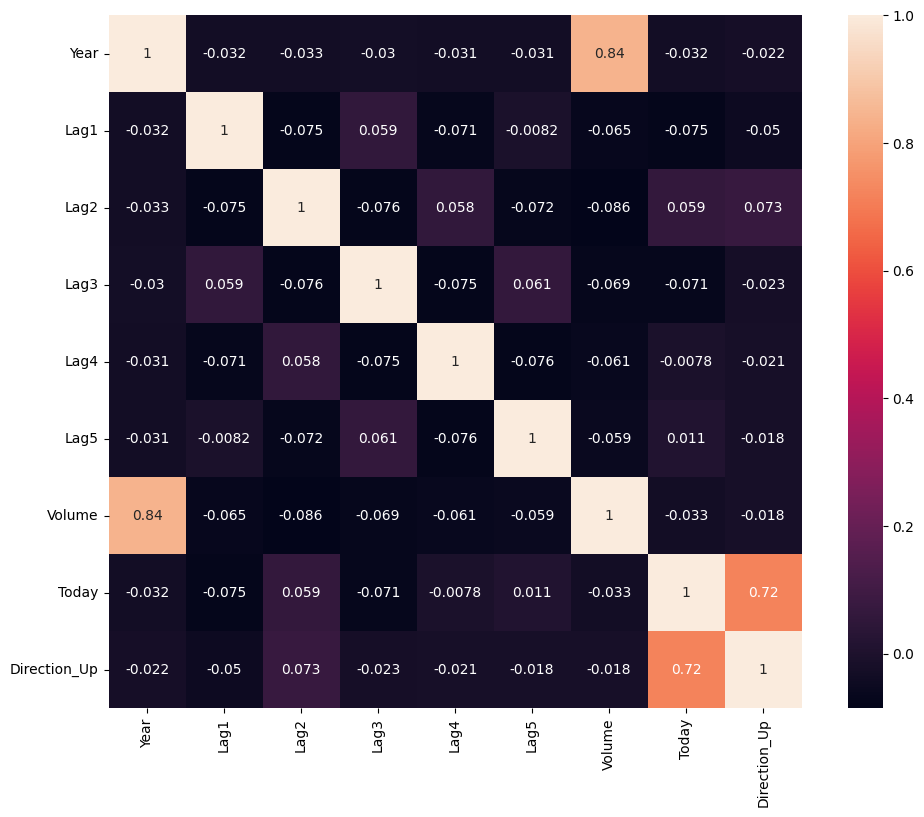

In [55]:
# Correlation matrix
corr_matrix = weekly.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=1, square=True, annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0);

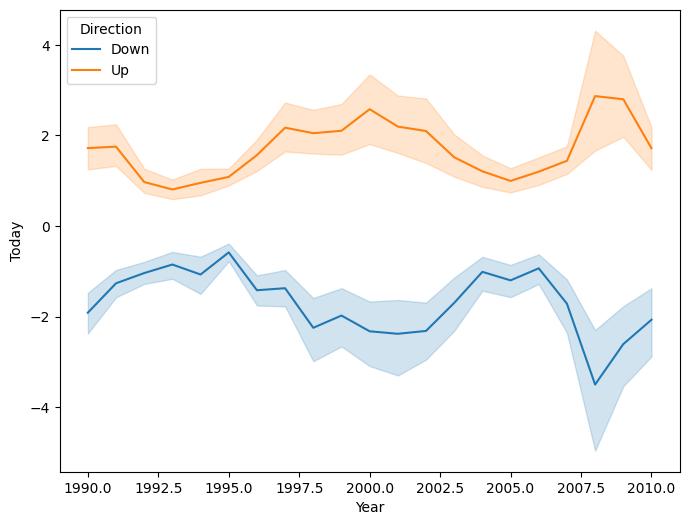

In [13]:
plt.figure(figsize=(8,6))
sns.lineplot(data=weekly, x='Year', y='Today', hue='Direction')
plt.show()

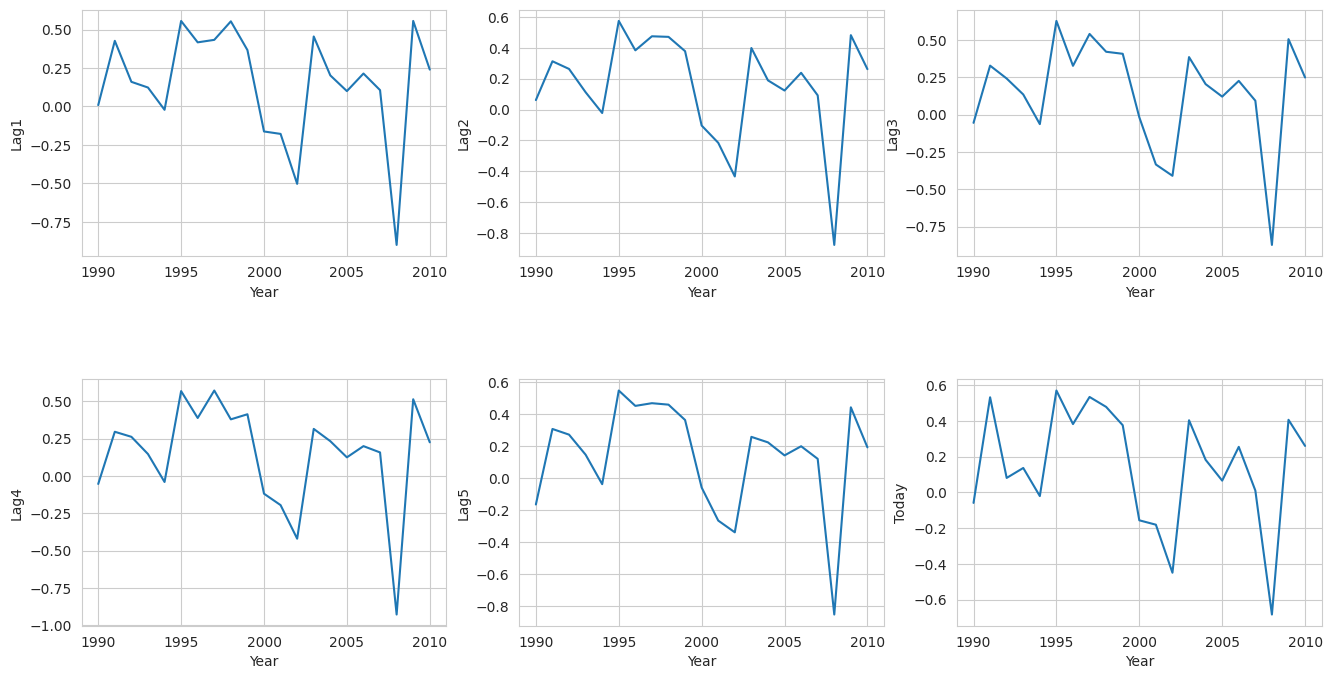

In [57]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.2)

sns.lineplot(data=weekly, x='Year', y='Lag1', errorbar=None, ax=axes[0,0])
sns.lineplot(data=weekly, x='Year', y='Lag2', errorbar=None, ax=axes[0,1])
sns.lineplot(data=weekly, x='Year', y='Lag3', errorbar=None, ax=axes[0,2])
sns.lineplot(data=weekly, x='Year', y='Lag4', errorbar=None, ax=axes[1,0])
sns.lineplot(data=weekly, x='Year', y='Lag5', errorbar=None, ax=axes[1,1])
sns.lineplot(data=weekly, x='Year', y='Today', errorbar=None, ax=axes[1,2])

plt.show()

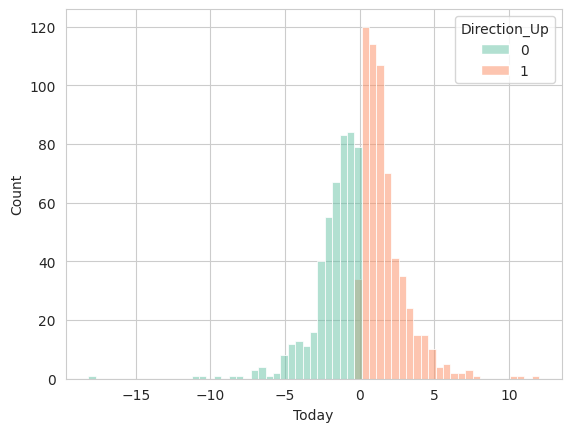

In [59]:
sns.histplot(data=weekly, x='Today', hue='Direction_Up', palette='Set2')
plt.show()

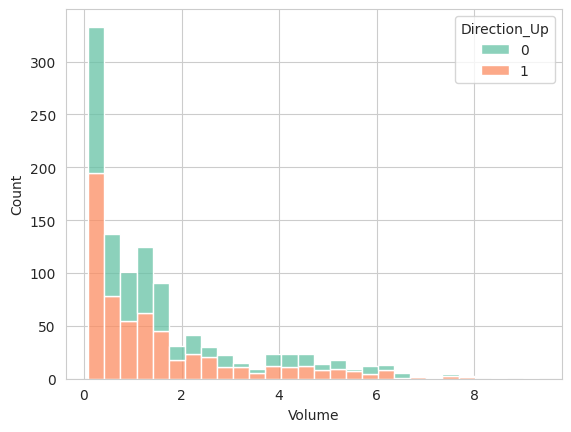

In [61]:
sns.set_style('whitegrid')
sns.histplot(data=weekly, x='Volume', hue='Direction_Up', palette='Set2', multiple='stack')
plt.show()

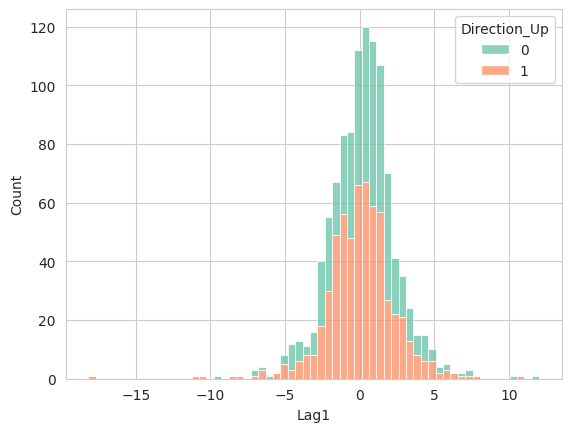

In [62]:

sns.histplot(data=weekly, x='Lag1', hue='Direction_Up', palette='Set2', multiple='stack')
plt.show()


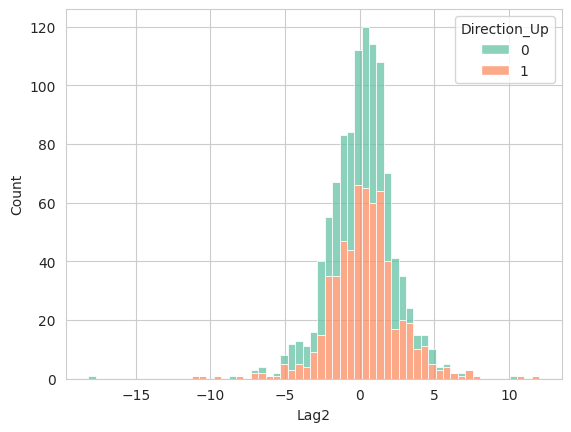

In [63]:
sns.histplot(data=weekly, x='Lag2', hue='Direction_Up', palette='Set2', multiple='stack')
plt.show()

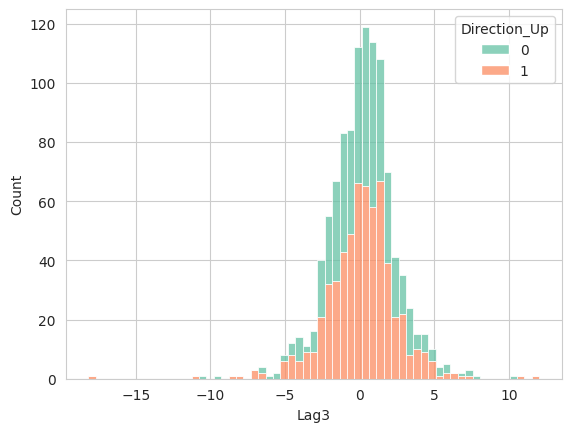

In [64]:
sns.histplot(data=weekly, x='Lag3', hue='Direction_Up', palette='Set2', multiple='stack')
plt.show()

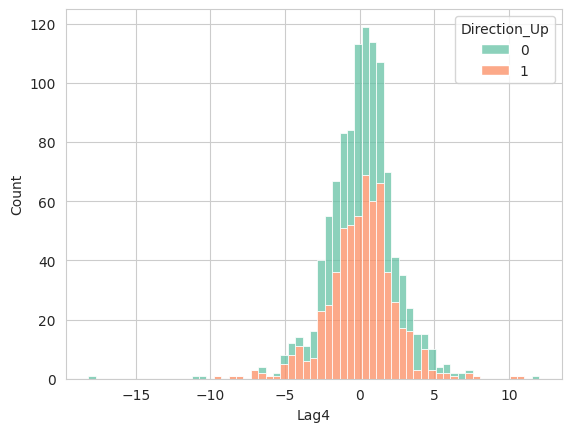

In [65]:
sns.histplot(data=weekly, x='Lag4', hue='Direction_Up', palette='Set2', multiple='stack')
plt.show()

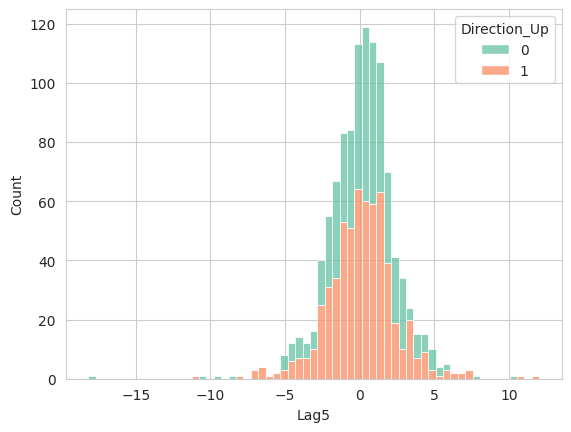

In [66]:
sns.histplot(data=weekly, x='Lag5', hue='Direction_Up', palette='Set2', multiple='stack')
plt.show()

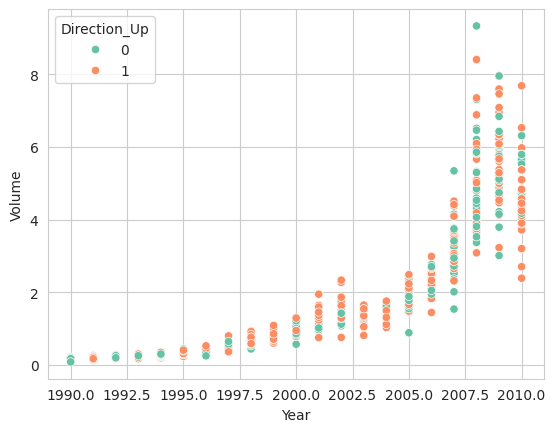

In [67]:
sns.scatterplot(data=weekly, x='Year', y='Volume', hue='Direction_Up', palette='Set2')
plt.show()

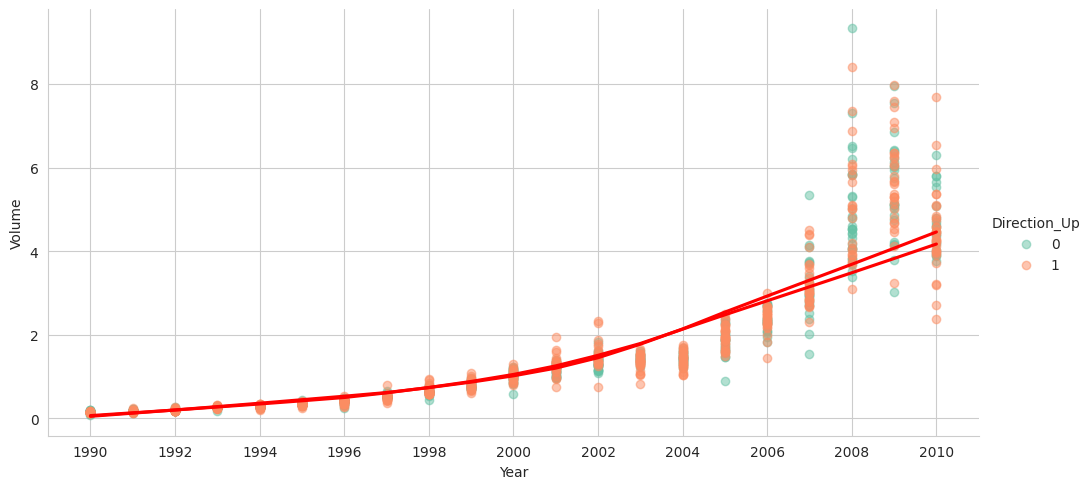

In [89]:
sns.lmplot(data=weekly, x='Year', y='Volume', hue="Direction_Up", scatter_kws={"alpha": 0.5},line_kws={'color': 'red'}, lowess=True, palette="Set2", markers=["o", "o"], aspect=2)
ax = plt.gca()
ax.set_xticks(np.arange(1990,2011, 2))
plt.show()